In [67]:
import numpy as np
import matplotlib.pyplot as plt

import tifffile as tf

import os
import numpy as np
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
from matplotlib import cm
import cv2
from mpl_toolkits.axes_grid1 import make_axes_locatable

%matplotlib inline

In [74]:
def nanRobustBlur(I, dim):
    V=I.copy()
    V[I!=I]=0
    VV = cv2.medianBlur(V,dim[0])
#     VV = cv2.GaussianBlur(V,dim,0)
#     VV=cv2.blur(V,dim)   
    W=0*I.copy()+1
    W[I!=I]=0
    WW=cv2.blur(W,dim)    
    Z=VV/WW
    return Z 

In [75]:
def return_uv(img,
                     orientation,
                     anisotropy=1,
                     spacing=20,
                     window=20,
                     linelength=20,
                     linewidth=3,
                     linecolor='g',
                     colorOrient=True,
                     cmapOrient='hsv',
                     threshold=None,
                     alpha=1,
                     clim=[None, None],
                     cmapImage='gray',
                     showPlot=True):
    # Compute U, V such that they are as long as line-length when anisotropy = 1.
    U, V =  anisotropy*linelength * np.cos(2 * orientation), anisotropy*linelength * np.sin(2 * orientation)
    USmooth = nanRobustBlur(U, (window, window)) # plot smoothed vector field
    VSmooth = nanRobustBlur(V, (window, window)) # plot smoothed vector field
#     azimuthSmooth = (0.5*np.arctan2(VSmooth,USmooth)) % np.pi
#     RSmooth = np.sqrt(USmooth**2+VSmooth**2)
#     USmooth, VSmooth = RSmooth*np.cos(azimuthSmooth), RSmooth*np.sin(azimuthSmooth)
    
    return USmooth, VSmooth, U, V

In [76]:
Ret_Kazansky = tf.imread('Kazansky_525_retardance.ome.tif')
Ori_Kazansky = tf.imread('kazansky_525_orientation.ome.tif')

In [77]:
spacing = 3
USmooth, VSmooth, U, V = return_uv(Ret_Kazansky, Ori_Kazansky,\
                 anisotropy=Ret_Kazansky*0.04, \
                 spacing=spacing,
                 window=spacing,
                 linelength=spacing,
                 linewidth=0.5,
                 linecolor='g',
                 colorOrient=True,
                 cmapOrient='hsv',
                 threshold=None,
                 alpha=0.6,
                 clim=[0, 25],
                 cmapImage='gray',
                 showPlot=True,)

error: OpenCV(4.2.0) /Users/travis/build/skvark/opencv-python/opencv/modules/imgproc/src/median_blur.simd.hpp:975: error: (-210:Unsupported format or combination of formats)  in function 'medianBlur'


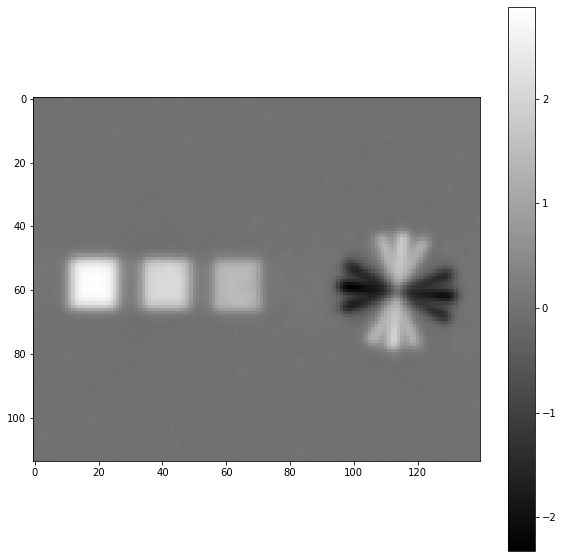

In [73]:
plt.figure(figsize=(10,10))
plt.imshow(USmooth, cmap='gray')
plt.colorbar()